#  第二讲 复杂网络的统计特征【实践】一

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2

## 常见的度分布：泊松分布与幂律分布

### 泊松分布：以ER随机网络为例

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 创建一个ER随机网络
n = 10000
p = 0.001
ER = nx.erdos_renyi_graph(n, p)

In [3]:
# 获取平均度
d = dict(nx.degree(ER))
print("平均度为：", sum(d.values())/len(ER.nodes))

平均度为： 10.0042


In [4]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values())+1))
y = [i/n for i in nx.degree_histogram(ER)]

Text(0, 0.5, '$p_k$')

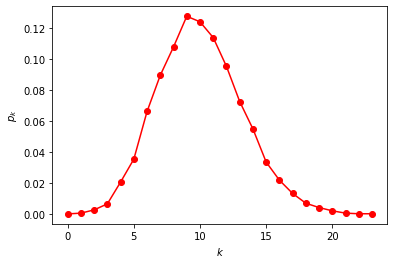

In [5]:
# 绘制度分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

### 幂律分布：以BA无标度网络为例

In [6]:
m = 3
BA = nx.barabasi_albert_graph(n, m)

In [7]:
# 获取平均度
d = dict(nx.degree(BA))
print("平均度为：", sum(d.values())/len(BA.nodes))

平均度为： 5.9982


Text(0, 0.5, '$p_k$')

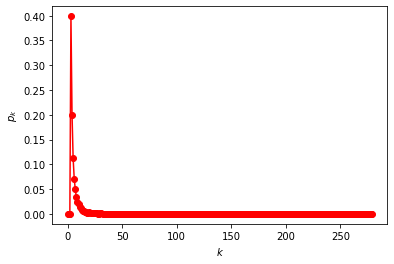

In [8]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values())+1))
y = [i/n for i in nx.degree_histogram(BA)]
# 绘制度分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

Text(0, 0.5, '$p_k$')

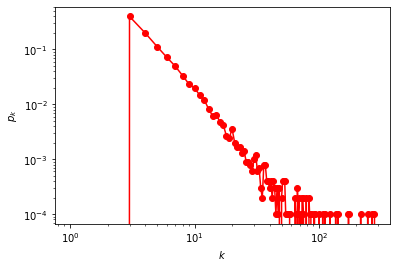

In [9]:
# 在双对数坐标轴下显示
plt.plot(x, y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

In [10]:
# 在双对数坐标轴下要把横坐标和纵坐标的0值排除掉

Text(0, 0.5, '$p_k$')

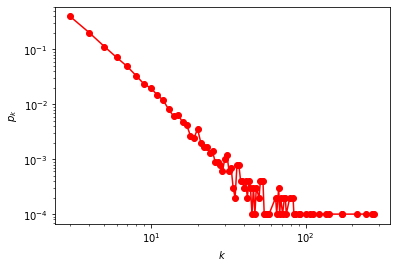

In [11]:
new_x = []
new_y = []
for i in range(len(x)):
    if y[i] != 0:
        new_x.append(x[i])
        new_y.append(y[i])
plt.plot(new_x, new_y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

## 网络的直径、效率和平均最短距离

### 直径

In [12]:
G1 = nx.barabasi_albert_graph(1000, 3)
print("网络的直径为：", nx.diameter(G1))

网络的直径为： 6


In [13]:
# 指定节点对i和j之间的效率：前提是这两个节点之家要有路径，即从i到j是可达的
print(nx.efficiency(G1, 1, 5))
print(nx.shortest_path_length(G1, 1, 5))

1.0
1


In [14]:
# 局部效率
print(nx.local_efficiency(G1))

0.031765166466089886


In [15]:
# 全局效率：直接调用下列函数的前提是网络G1要是连通的
print(nx.global_efficiency(G1))

0.3040286953627974


In [17]:
# 求整个网络的平均距离：直接调用下列函数的前提是网络G1要是连通的
print(nx.average_shortest_path_length(G1))

3.4794314314314314


## 节点的集聚系数和平均集聚系数

### 集聚系数

In [18]:
print(nx.clustering(G1))

{0: 0.038306451612903226, 1: 0.014634146341463415, 2: 0.011904761904761904, 3: 0.06666666666666667, 4: 0.014306753629286767, 5: 0.01568627450980392, 6: 0.03333333333333333, 7: 0.01807909604519774, 8: 0.013876040703052728, 9: 0.01139240506329114, 10: 0.06666666666666667, 11: 0.009389671361502348, 12: 0.03684210526315789, 13: 0.10714285714285714, 14: 0.014285714285714285, 15: 0.008658008658008658, 16: 0.008333333333333333, 17: 0.09523809523809523, 18: 0.014705882352941176, 19: 0.012903225806451613, 20: 0.018115942028985508, 21: 0.007936507936507936, 22: 0.016091954022988506, 23: 0.016129032258064516, 24: 0.03162055335968379, 25: 0.05555555555555555, 26: 0.015789473684210527, 27: 0.03636363636363636, 28: 0.044444444444444446, 29: 0.019943019943019943, 30: 0.036923076923076927, 31: 0.06593406593406594, 32: 0.16666666666666666, 33: 0.021645021645021644, 34: 0.025, 35: 0.015384615384615385, 36: 0.008912655971479501, 37: 0.02197802197802198, 38: 0.011857707509881422, 39: 0.009523809523809525,

### 平均集聚系数

In [19]:
print(nx.average_clustering(G1))

0.029377356100918663


### 全局集聚系数

In [20]:
print(nx.transitivity(G1))

0.016313420001011686
